# matrix inverse method 회귀분석

## pyspark 기본 셋팅

In [1]:
import os
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### 1) matrix inverse method로 $\hat{w}$을 계산

In [2]:
import numpy as np
x = np.array([[1,2],[1,4],[1,6]])
y = np.array([3,6,7])

In [3]:
xTx=np.dot(x.T,x)
print("xTx=",xTx)

xTx= [[ 3 12]
 [12 56]]


In [4]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

xTxI= [[ 2.33333333 -0.5       ]
 [-0.5         0.125     ]]


In [5]:
xTyT=np.dot(x.T,y)
print("xTyT=",xTyT)

xTyT= [16 72]


In [6]:
print("weights=",np.dot(xTxI,xTyT))

weights= [1.33333333 1.        ]


In [7]:
w1, w0=np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

In [8]:
w0, w1

(1.0, 1.3333333333333357)

### 2) 예측과 실제의 오류 합계를 계산

In [9]:
w=np.array([w0,w1])
print(w)

[1.         1.33333333]


In [10]:
x.shape,w.shape
w=w[:,np.newaxis]
print(w.shape)
print(w)

(2, 1)
[[1.        ]
 [1.33333333]]


In [11]:
pred=np.dot(x,w)
print(pred)

[[3.66666667]
 [6.33333333]
 [9.        ]]


### 3) 입력 데이터와 회귀선의 그래프를 작성한다.

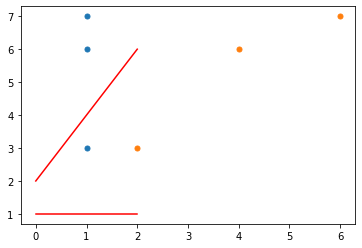

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, 'r-',x,y,'o', markersize=5)
plt.show()